<a href="https://colab.research.google.com/github/ayush2281/Pytorch-for-ML-DL-/blob/main/Milestone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#08. PyTorch Paper Replicating
Welcome to Milestone Project 2: PyTorch Paper Replicating!

In this project, we're going to be **replicating a machine learning research paper and creating a Vision Transformer (ViT)** from scratch using PyTorch.

We'll then see how ViT, a state-of-the-art computer vision architecture, performs on our FoodVision Mini problem.

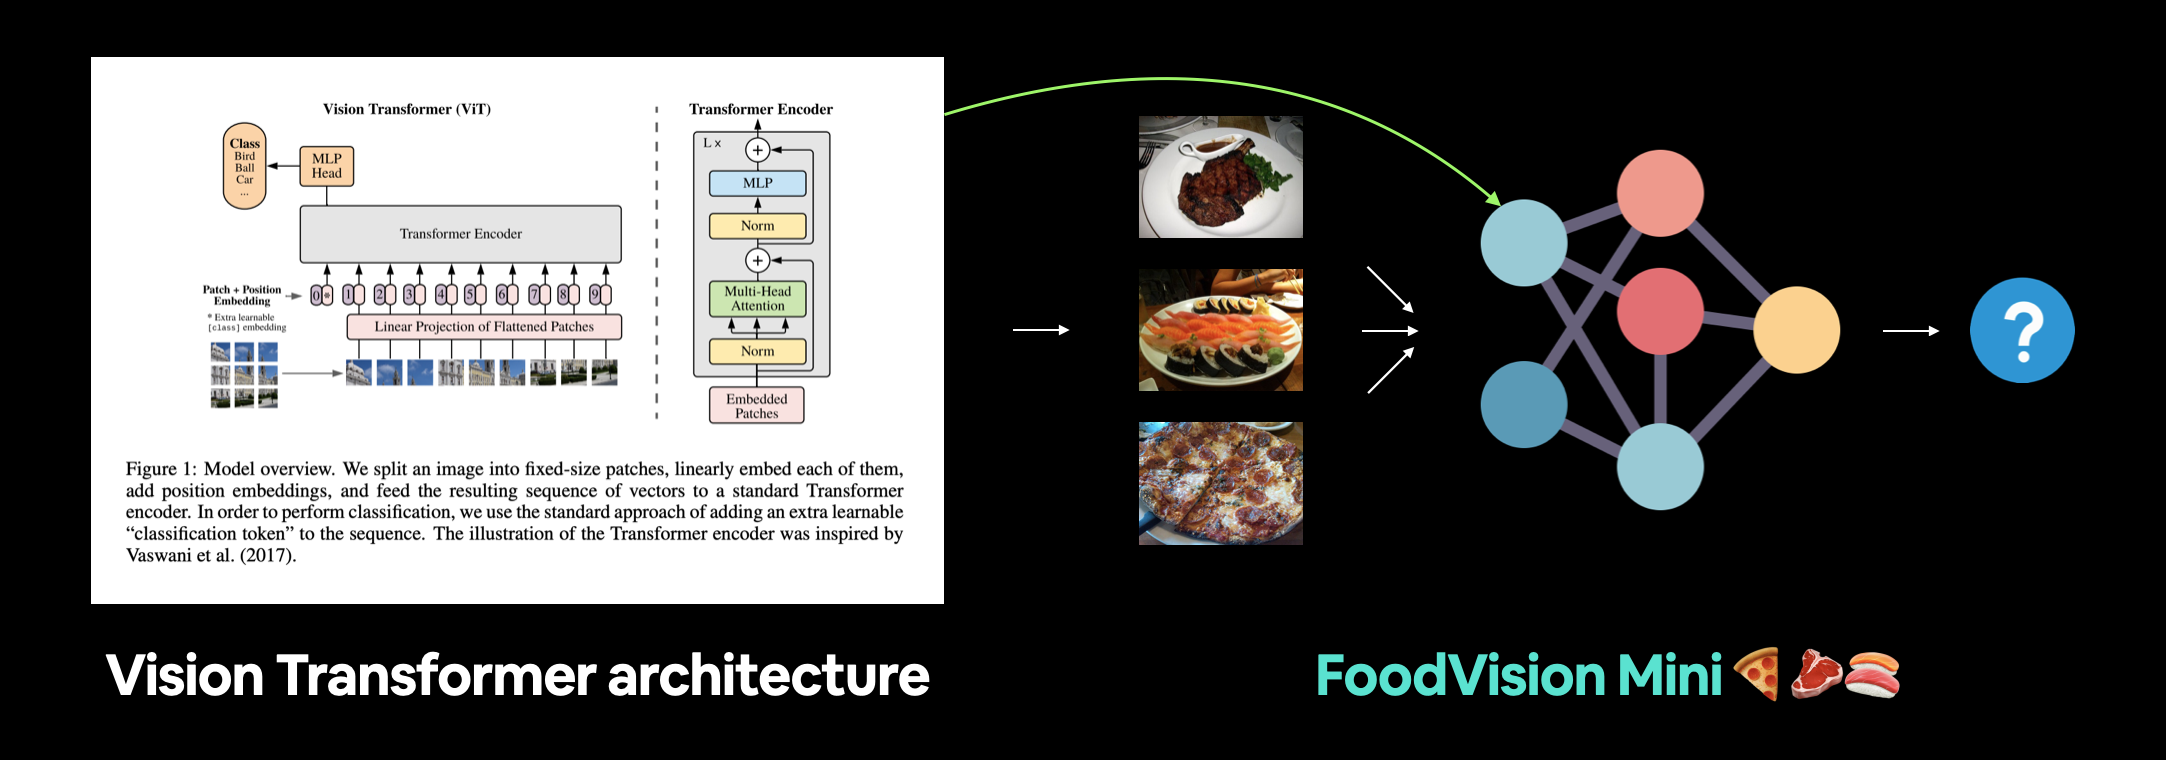

For Milestone Project 2 we're going to focus on recreating the Vision Transformer (ViT) computer vision architecture and applying it to our FoodVision Mini problem to classify different images of pizza, steak and sushi.






What is paper replicating?
It's no secret machine learning is advancing fast.

Many of these advances get published in machine learning research papers.

And the goal of paper replicating is to replicate these advances with code so you can use the techniques for your own problem.

For example, let's say a new model architecture gets released that performs better than any other architecture before on various benchmarks, wouldn't it be nice to try that architecture on your own problems?

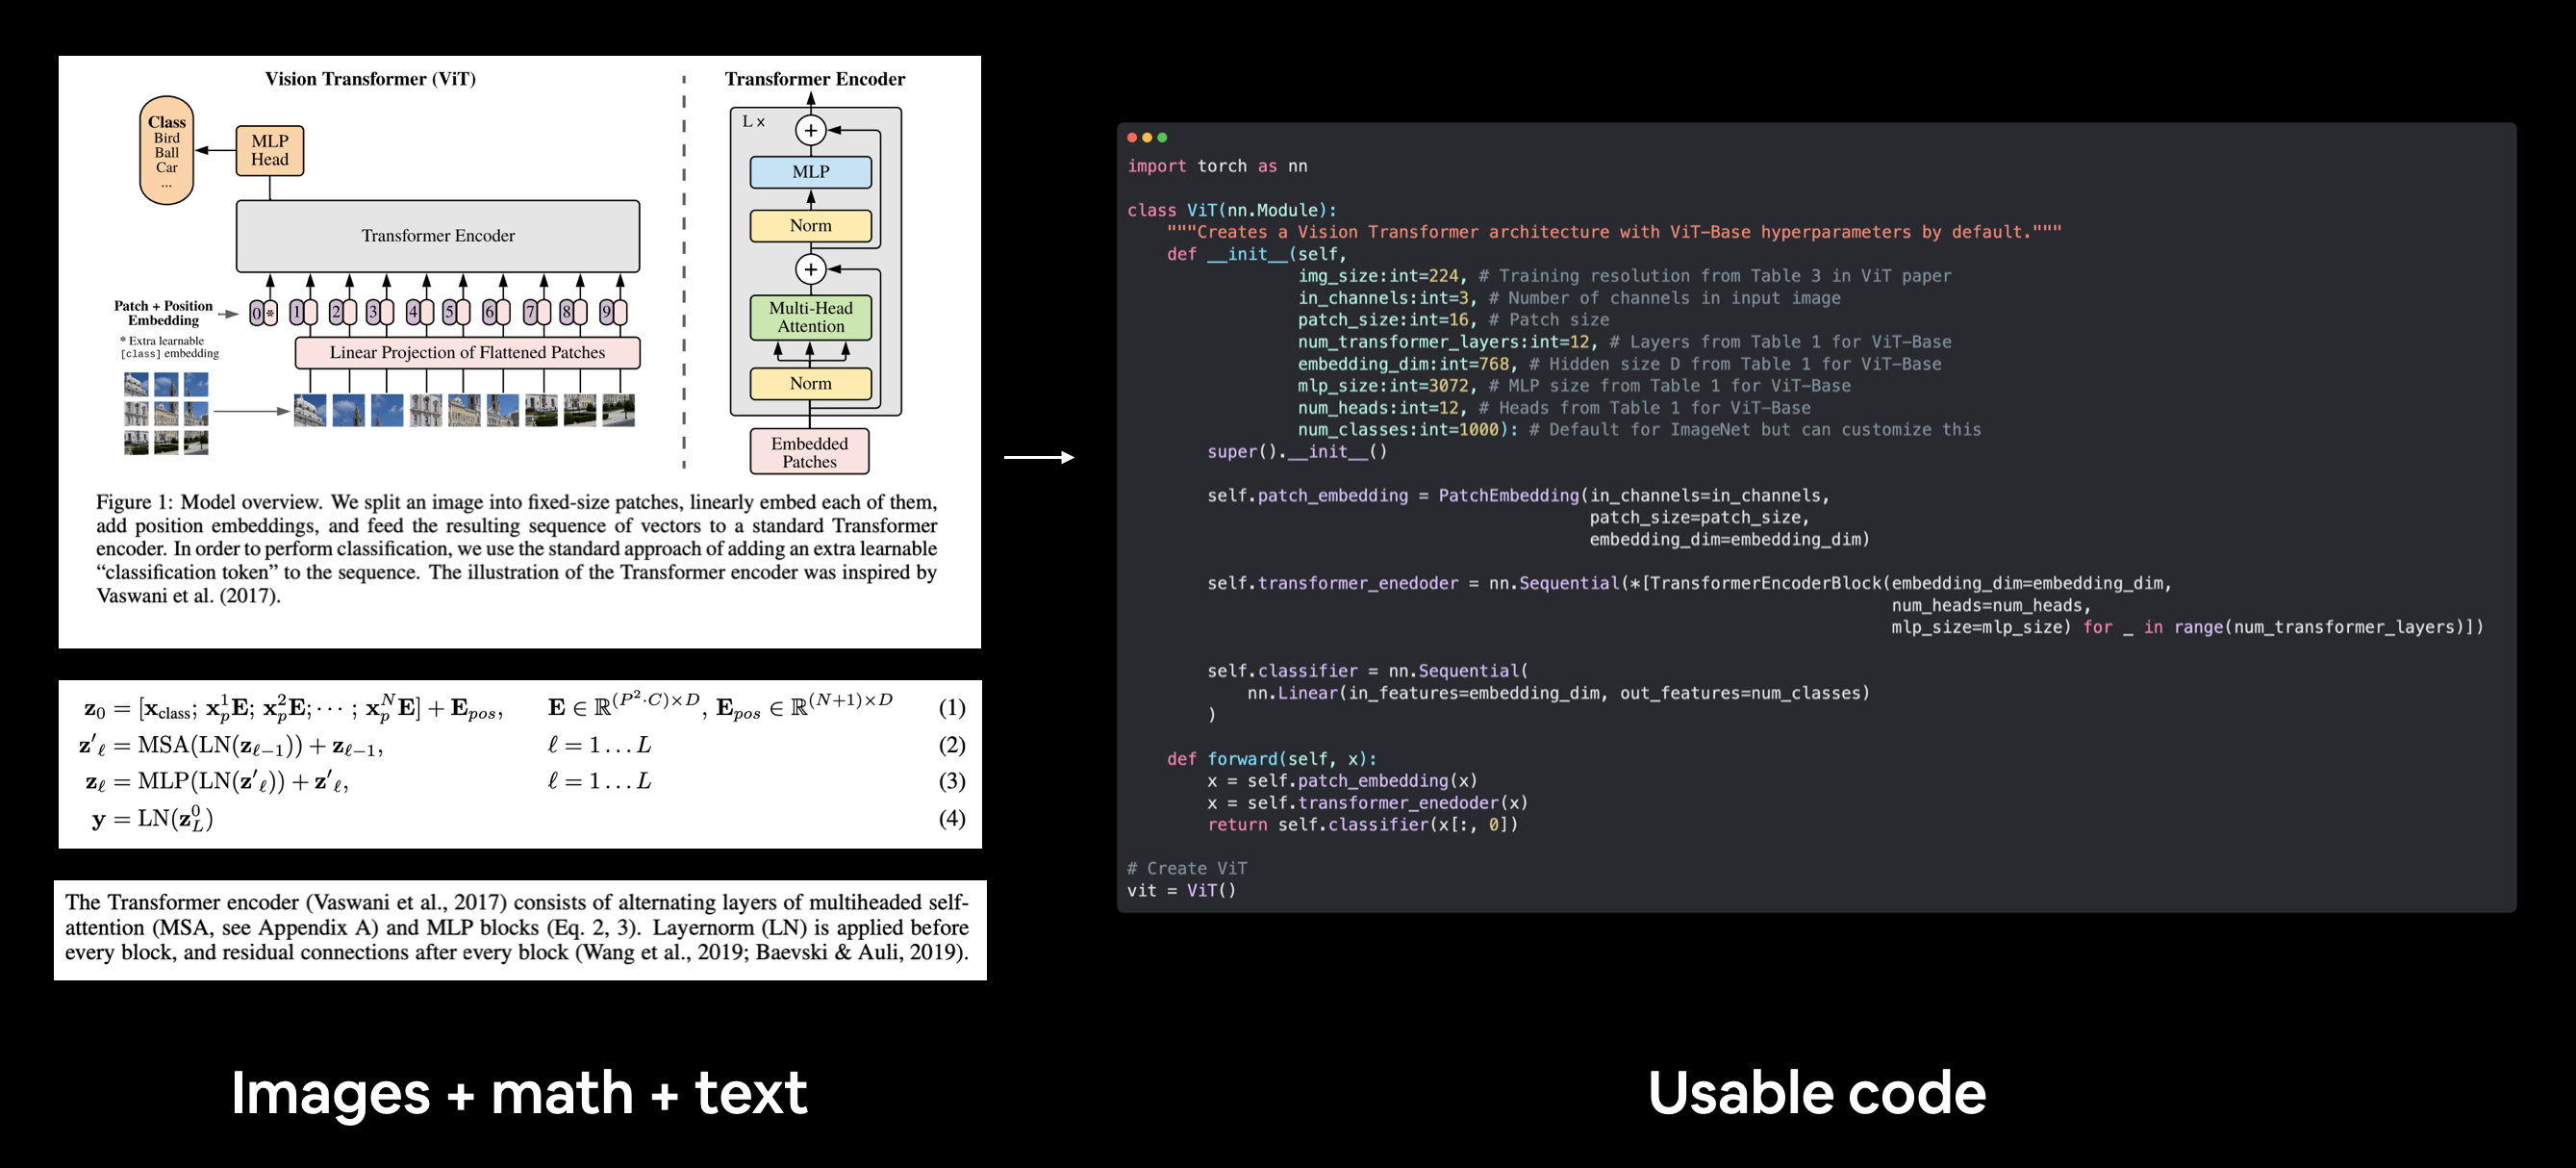

Machine learning paper replicating involves turning a machine learning paper comprised of images/diagrams, math and text into usable code and in our case, usable PyTorch code. Diagram, math equations and text from the ViT paper.


What is a machine learning research paper?
A machine learning research paper is a scientific paper that details findings of a research group on a specific area.

The contents of a machine learning research paper can vary from paper to paper but they generally follow the structure:


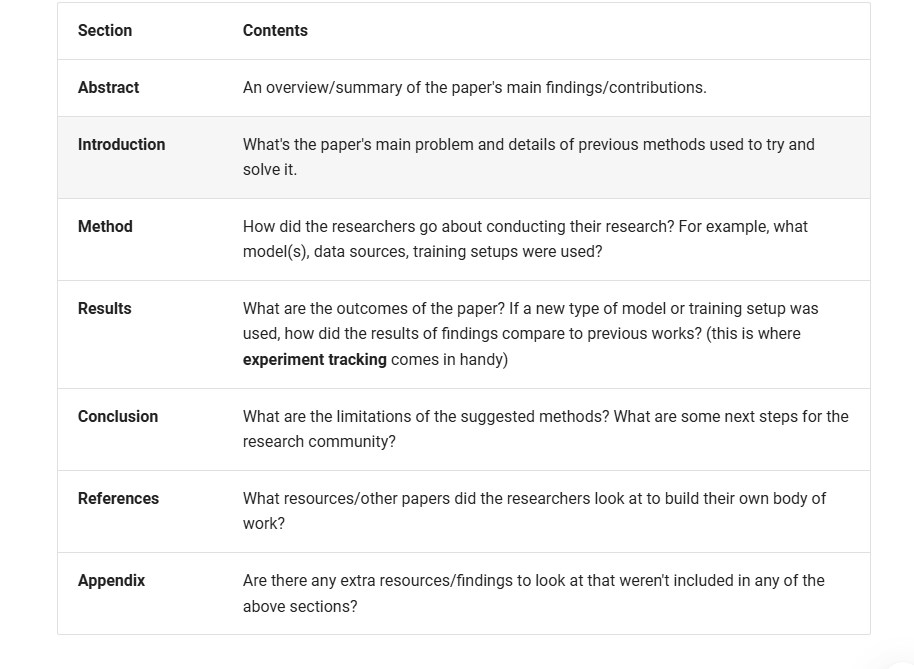

Why replicate a machine learning research paper?
A machine learning research paper is often a presentation of months of work and experiments done by some of the best machine learning teams in the world condensed into a few pages of text.

And if these experiments lead to better results in an area related to the problem you're working on, it'd be nice to check them out.

Also, replicating the work of others is a fantastic way to practice your skills.

george hotz quote saying to get better at being a machine learning engineer, download a paper, implement it and keep going until you have skills



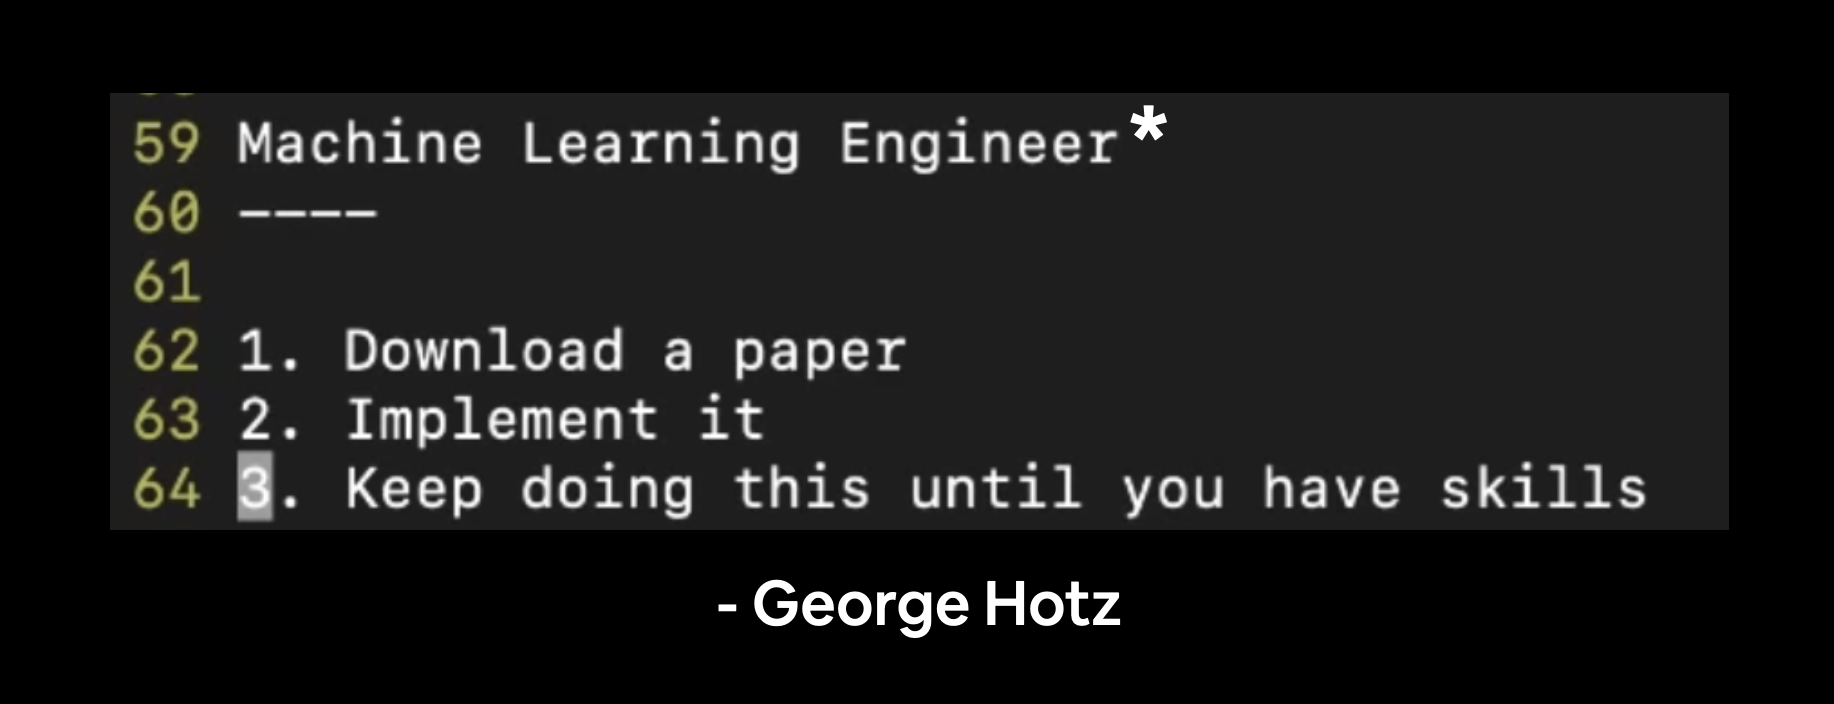

George Hotz is founder of comma.ai, a self-driving car company and livestreams machine learning coding on Twitch and those videos get posted in full to YouTube. I pulled this quote from one of his livestreams. The "٭" is to note that machine learning engineering often involves the extra step(s) of preprocessing data and making your models available for others to use (deployment).

When you first start trying to replicate research papers, you'll likely be overwhelmed.

That's normal.

Research teams spend weeks, months and sometimes years creating these works so it makes sense if it takes you sometime to even read let alone reproduce the works.

Replicating research is such a tough problem, phenomenal machine learning libraries and tools such as, HuggingFace, PyTorch Image Models (timm library) and fast.ai have been born out of making machine learning research more accessible.


#Where can you find code examples for machine learning research papers?
One of the first things you'll notice when it comes to machine learning research is: there's a lot of it.

So beware, trying to stay on top of it is like trying to outrun a hamster wheel.

Follow your interest, pick a few things that stand out to you.

In saying this, there are several places to find and read machine learning research papers (and code):

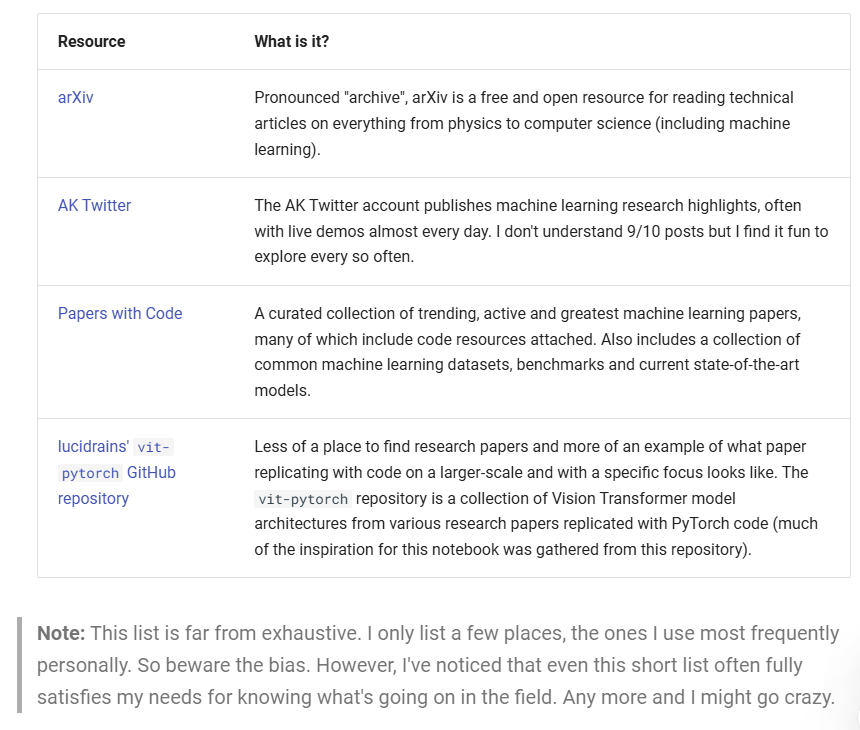

1. [aeXiv](https://arxiv.org/)

2. [Ak twiter](https://x.com/_akhaliq)
3. [Papers with code](https://https://paperswithcode.com/)
4. [lucidrains' vit-pytorch GitHub repository](https:////github.com/lucidrains/vit-pytorch)


What we're going to cover
Rather than talk about replicating a paper, we're going to get hands-on and actually replicate a paper.

The process for replicating all papers will be slightly different but by seeing what it's like to do one, we'll get the momentum to do more.

More specifically, we're going to be replicating the machine learning research paper An Image is [Worth 16x16 Words: Transformers for Image Recognition at Scale](https://https://arxiv.org/abs/2010.11929) (ViT paper) with PyTorch.

The Transformer neural network architecture was originally introduced in the machine learning research paper Attention is all you need.

And the original Transformer architecture was designed to work on one-dimensional (1D) sequences of text.

A Transformer architecture is generally considered to be any neural network that uses the attention mechanism) as its primary learning layer. Similar to how a convolutional neural network (CNN) uses convolutions as its primary learning layer.

Like the name suggests, **the Vision Transformer (ViT) architecture was designed to adapt the original Transformer architecture to vision problem(s)**(classification being the first and since many others have followed).

The original Vision Transformer has been through several iterations over the past couple of years, however, we're going to focus on replicating the original, otherwise known as the "vanilla Vision Transformer". Because if you can recreate the original, you can adapt to the others.

We're going to be focusing on building the ViT architecture as per the original ViT paper and applying it to FoodVision Mini.

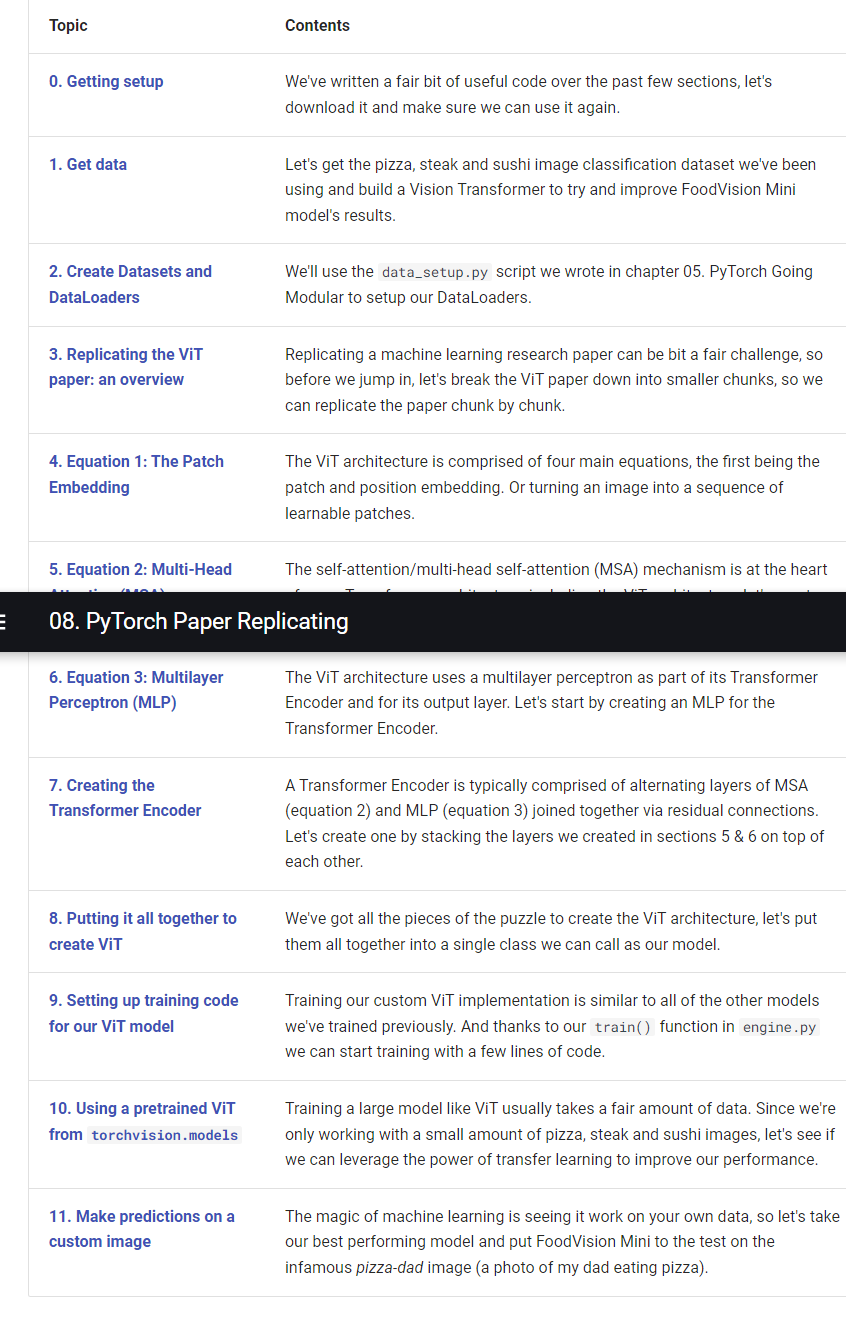

  **Note**: Despite the fact we're going to be focused on replicating the ViT paper, avoid getting too bogged down on a particular paper as newer better methods will often come along, quickly, so the skill should be to remain curious whilst building the fundamental skills of turning math and words on a page into working code.

#Terminology
There are going to be a fair few acronyms throughout this notebook.

In light of this, here are some definitions:

* **ViT** - Stands for Vision Transformer (the main neural network architecture we're going to be focused on replicating).
* **ViT paper** - Short hand for the original machine learning research paper that introduced the ViT architecture, An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale, anytime ViT paper is mentioned, you can be assured it is referencing this paper.

#0. Getting setup
As we've done previously, let's make sure we've got all of the modules we'll need for this section.

We'll import the Python scripts (such as `data_setup.py` and `engine.py`) we created in `05. PyTorch Going Modular.`

To do so, we'll download going_modular directory from the pytorch-deep-learning repository `(if we don't already have it)`.

We'll also get the `torchinfo` package if it's not available.

torchinfo will help later on to give us a visual representation of our model.

And since later on we'll be using `torchvision v0.13 package`  `(available as of July 2022)`, we'll make sure we've got the latest versions.

In [ ]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.5.0+cu121
torchvision version: 0.20.0+cu121


 Note: If you're using Google Colab and the cell above starts to install various software packages, you may have to restart your runtime after running the above cell. After restarting, you can run the cell again and verify you've got the right versions of torch and torchvision.

Now we'll continue with the regular imports, setting up device agnostic code and this time we'll also get the helper_functions.py script from GitHub.

The helper_functions.py script contains several functions we created in previous sections:

* `set_seeds()` to set the random seeds `(created in 07. PyTorch Experiment Tracking section 0)`.
* `download_data()` to download a data source given a link (created in 07. PyTorch Experiment Tracking section 1).
* `plot_loss_curves()` to inspect our model's training results (created in 04. PyTorch Custom Datasets section 7.8)

In [ ]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find torchinfo... installing it.
[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4356, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (143/143), done.


Note: If you're using Google Colab, and you don't have a GPU turned on yet, it's now time to turn one on via Runtime -> `Change runtime type -> Hardware accelerator -> GPU.`



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

1. Get Data
Since we're continuing on with FoodVision Mini, let's download the `pizza, steak and sushi image dataset` we've been using.

To do so we can use the `download_data()` function from helper_functions.py that we created in 07. `PyTorch Experiment Tracking section 1.`

We'll source to the raw GitHub link of the `pizza_steak_sushi.zip` data and the destination to pizza_steak_sushi.

In [ ]:
# download the pizza steak sushi image from git
image_path = download_data(source = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination = "pizza_steak_sushi")
image_path


Beautiful! Data downloaded, let's setup the training and test directories.


In [ ]:
# setup the directory path to train and test image
train_dir = image_path / "train"
test_dir = image_path / "test"


#2. Create Datasets and DataLoaders
Now we've got some data, let's now turn it into DataLoader's.

To do so we can use the `create_dataloaders()` function in data_setup.py.

First, we'll create a transform to prepare our images.

This where one of the first references to the ViT paper will come in.

In Table 3, the training resolution is mentioned as being `224 (height=224, width=224).`

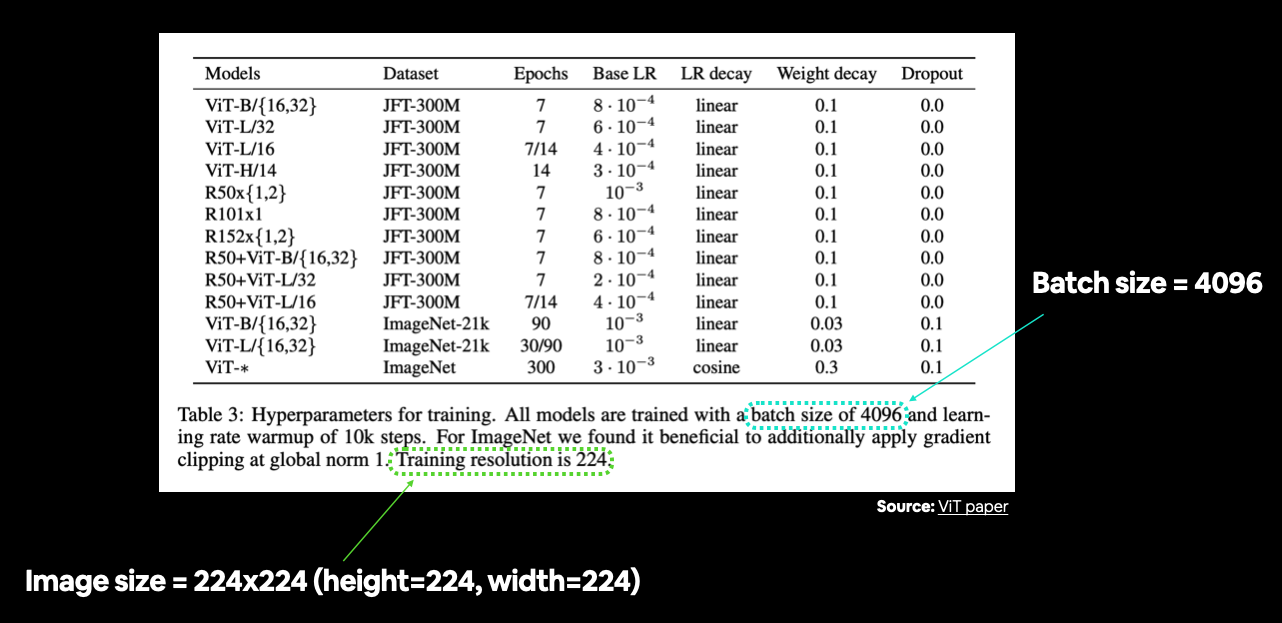

You can often find various hyperparameter settings listed in a table. In this case we're still preparing our data, so we're mainly concerned with things like image size and batch size. Source: Table 3 in ViT paper.

So we'll make sure our transform resizes our images appropriately.

And since we'll be training our model from scratch (no transfer learning to begin with), we won't provide a normalize transform like we did in 06. PyTorch Transfer Learning section 2.1.

#2.1 Prepare transforms for images

In [ ]:
# Create image size (from Table 3 in the ViT paper)

IMG_SIZE = 224

# create a transforms pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])
print(f"Mnaullay created treansforms: {manual_transforms}")


#2.2 Turn images into DataLoader's
Transforms created!

Let's now create our DataLoader's.

The ViT paper states the use of a batch size of 4096 which is 128x the size of the batch size we've been using (32).

However, we're going to stick with a batch size of 32.

Why?

Because some hardware (including the free tier of Google Colab) may not be able to handle a batch size of 4096.

Having a batch size of 4096 means that 4096 images need to fit into the GPU memory at a time.

This works when you've got the hardware to handle it like a research team from Google often does but when you're running on a single GPU (such as using Google Colab), making sure things work with smaller batch size first is a good idea.

An extension of this project could be to try a higher batch size value and see what happens.

 **Note**: We're using the pin_memory=True parameter in the create_dataloaders() function to speed up computation. pin_memory=True avoids unnecessary copying of memory between the CPU and GPU memory by "pinning" examples that have been seen before. Though the benefits of this will likely be seen with larger dataset sizes (our FoodVision Mini dataset is quite small). However, setting pin_memory=True doesn't always improve performance (this is another one of those we're scenarios in machine learning where some things work sometimes and don't other times), so best to experiment, experiment, experiment. See the PyTorch torch.utils.data.DataLoader documentation or Making Deep Learning Go Brrrr from First Principles by Horace He for more.

In [ ]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

#2.3 Visualize a single image
Now we've loaded our data, let's visualize, visualize, visualize!

An important step in the ViT paper is preparing the images into patches.

We'll get to what this means in section 4 but for now, let's view a single image and its label.

To do so, let's get a single image and label from a batch of data and inspect their shapes.

In [ ]:
# get the batches of images
image_batch , label_batch , = next(iter(train_dataloader))

# get the single image from label
image, label = image_batch[0], label_batch[0]

# view the batches shapes
image.shape , label

Wonderful!

Now let's plot the image and its label with matplotlib.

In [ ]:
# plot the imagr with matplotlib
plt.imshow(image.permute(1,2,0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False)


Nice!

Looks like our images are importing correctly, let's continue with the paper replication.


#3. Replicating the ViT paper: an overview
Before we write any more code, let's discuss what we're doing.

We'd like to replicate the ViT paper for our own problem, FoodVision Mini.

So our **`model inputs`** are: images of pizza, steak and sushi.

And our ideal **model outputs** are: predicted labels of pizza, steak or sushi.

No different to what we've been doing throughout the previous sections.

The question is: how do we go from our inputs to the desired outputs?


3.1 Inputs and outputs, layers and blocks
ViT is a deep learning neural network architecture.

And any neural network architecture is generally comprised of **layers**.

And a collection of layers is often referred to as a **block.**

And stacking many blocks together is what gives us the whole architecture.

A **layer** takes an input (say an image tensor), performs some kind of function on it (for example what's in the layer's forward() method) and then returns an output.

So if a single layer takes an input and gives an output, then a collection of layers or a block also takes an input and gives an output.

Let's make this concrete:

* Layer - takes an input, performs a function on it, returns an output.
* Block - a collection of layers, takes an input, performs a series of functions on it, returns an output.
* Architecture (or model) - a collection of blocks, takes an input, performs a series of functions on it, returns an output.
This ideology is what we're going to be using to replicate the ViT paper.

We're going to take it layer by layer, block by block, function by function putting the pieces of the puzzle together like Lego to get our desired overall architecture.

The reason we do this is because looking at a whole research paper can be intimidating.

So for a better understanding, we'll break it down, starting with the inputs and outputs of single layer and working up to the inputs and outputs of the whole model.

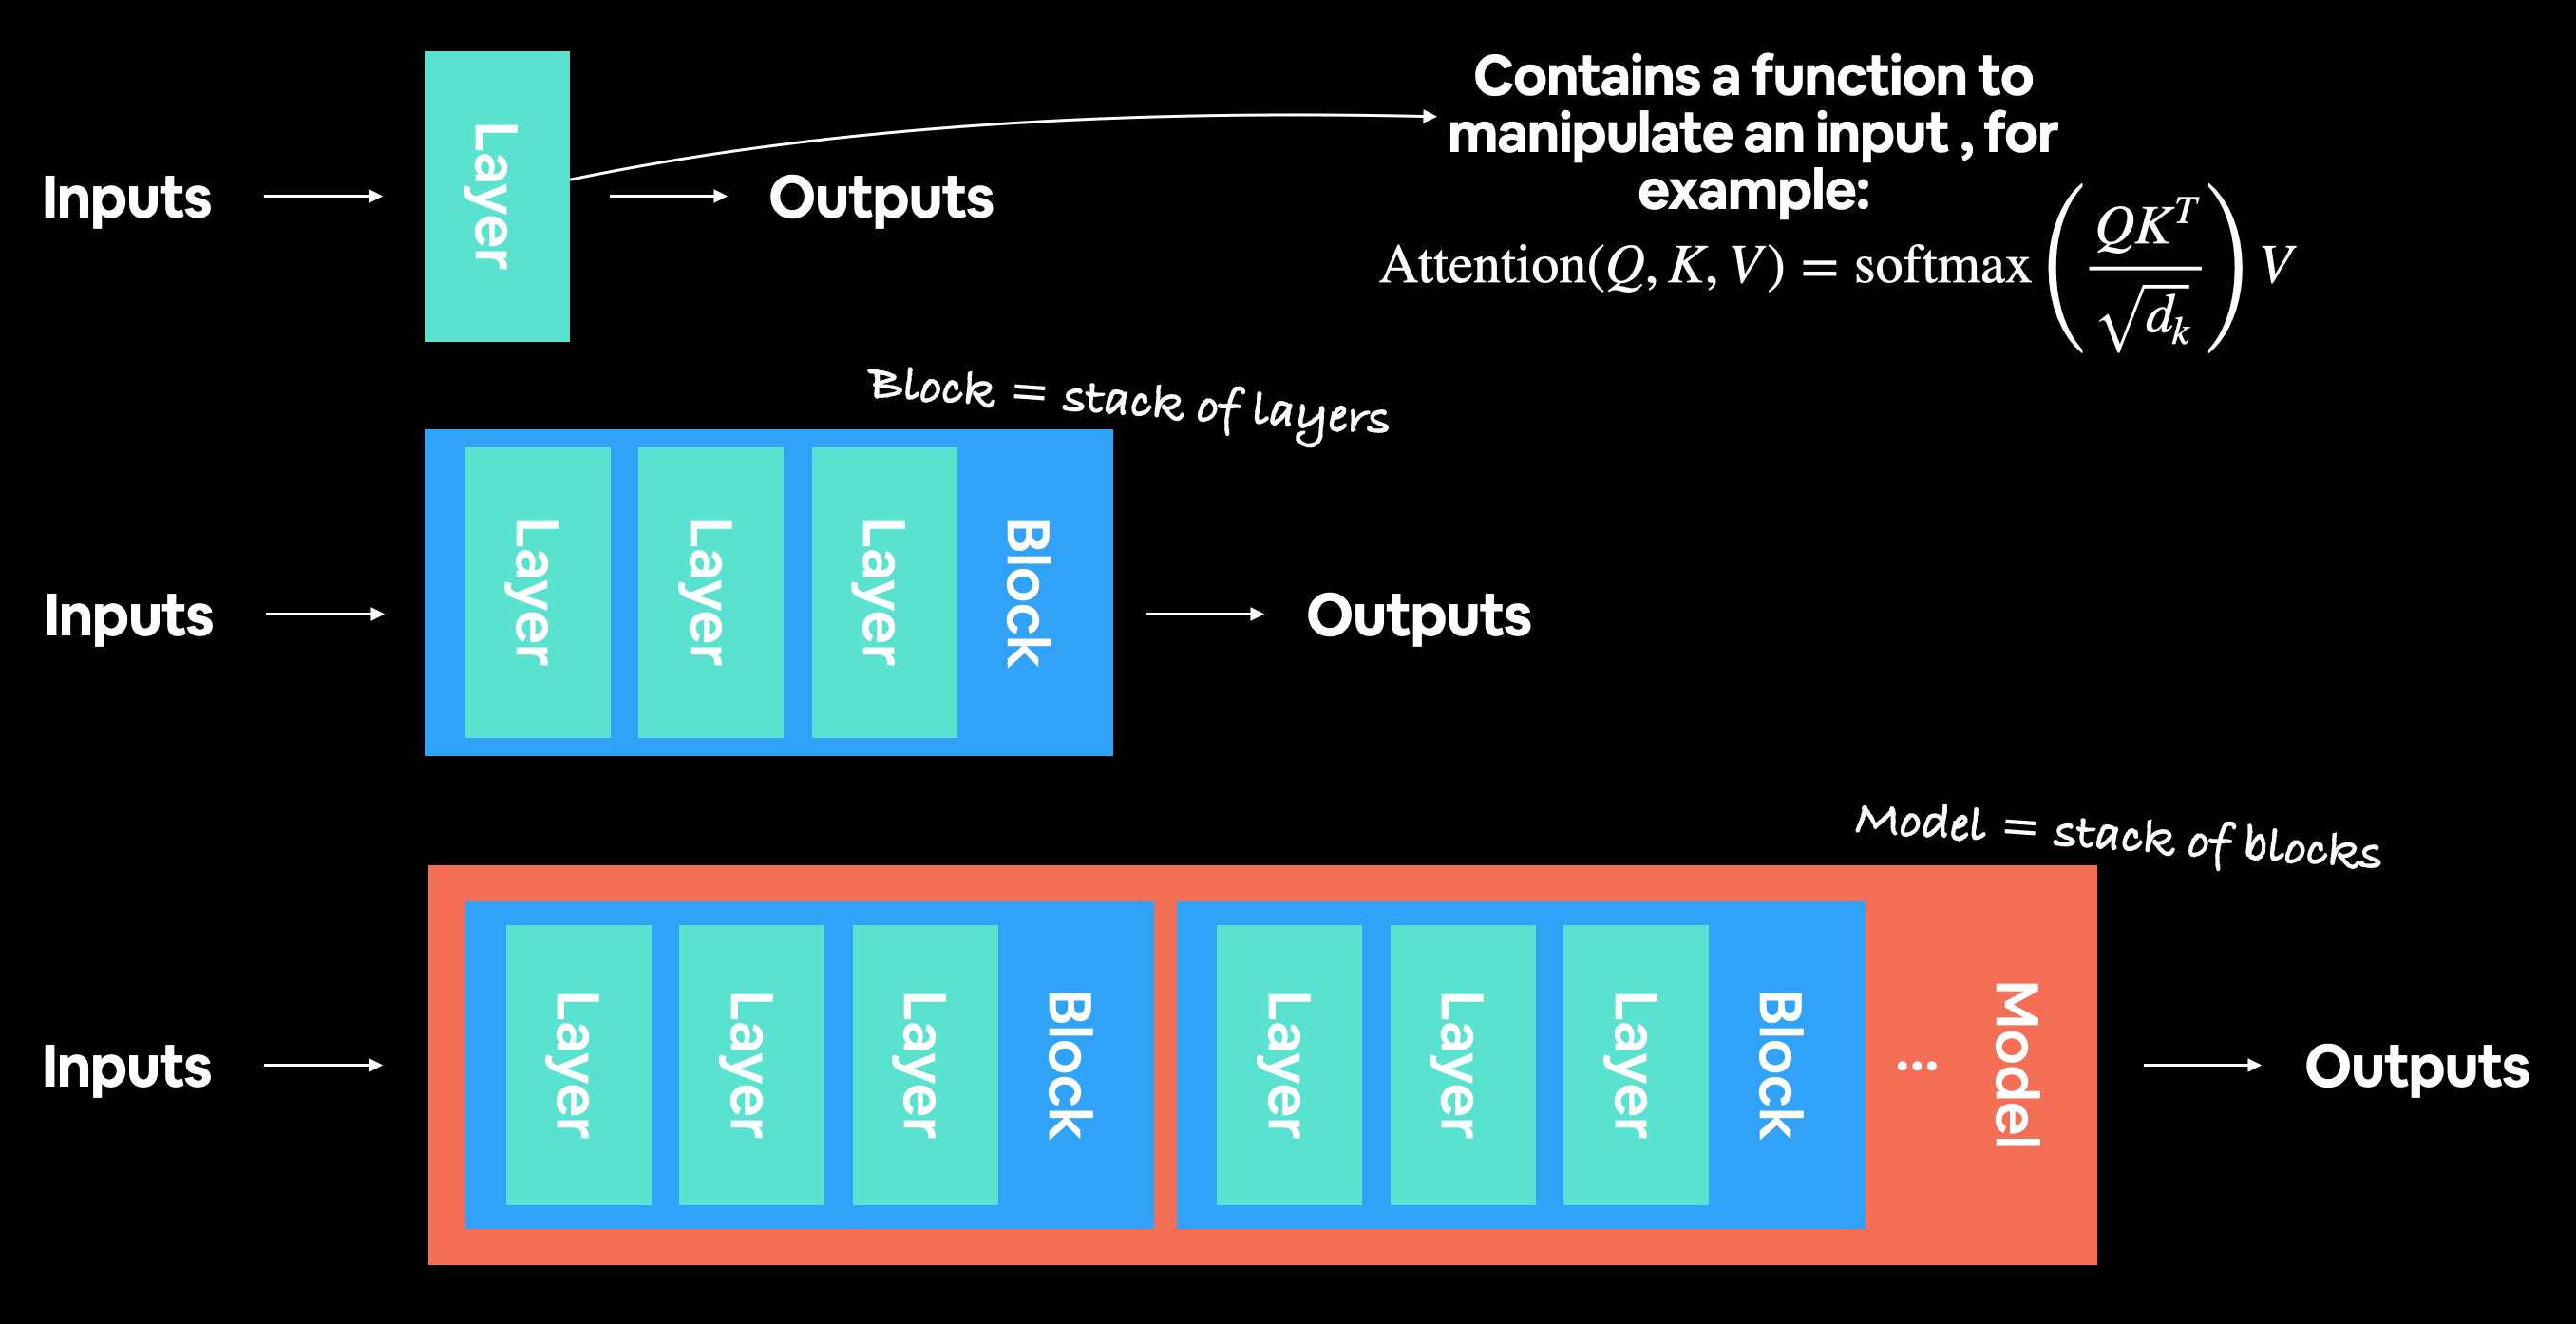

A modern deep learning architecture is usually collection of layers and blocks. Where layers take an input (data as a numerical representation) and manipulate it using some kind of function (for example, the self-attention formula pictured above, however, this function could be almost anything) and then output it. Blocks are generally stacks of layers on top of each other doing a similar thing to a single layer but multiple times.


#3.2 Getting specific: What's ViT made of?
There are many little details about the ViT model sprinkled throughout the paper.

Finding them all is like one big treasure hunt!

Remember, a research paper is often months of work compressed into a few pages so it's understandable for it to take of practice to replicate.

However, the main three resources we'll be looking at for the architecture design are:

1.  **Figure 1** - This gives an overview of the model in a graphical sense, you could almost recreate the architecture with this figure alone.
2.  **Four equations** in section 3.1 - These equations give a little bit more of a mathematical grounding to the coloured blocks in Figure 1.
3.  **Table 1** - This table shows the various hyperparameter settings (such as number of layers and number of hidden units) for different ViT model variants. We'll be focused on the smallest version, ViT-Base.

#3.2.1 Exploring Figure 1
Let's start by going through Figure 1 of the ViT Paper.

The main things we'll be paying attention to are:

1. **Layers** - takes an **input**, performs an operation or function on the input, produces an **output**.
2. **Blocks** - a collection of layers, which in turn also takes an **input** and produces an **output**

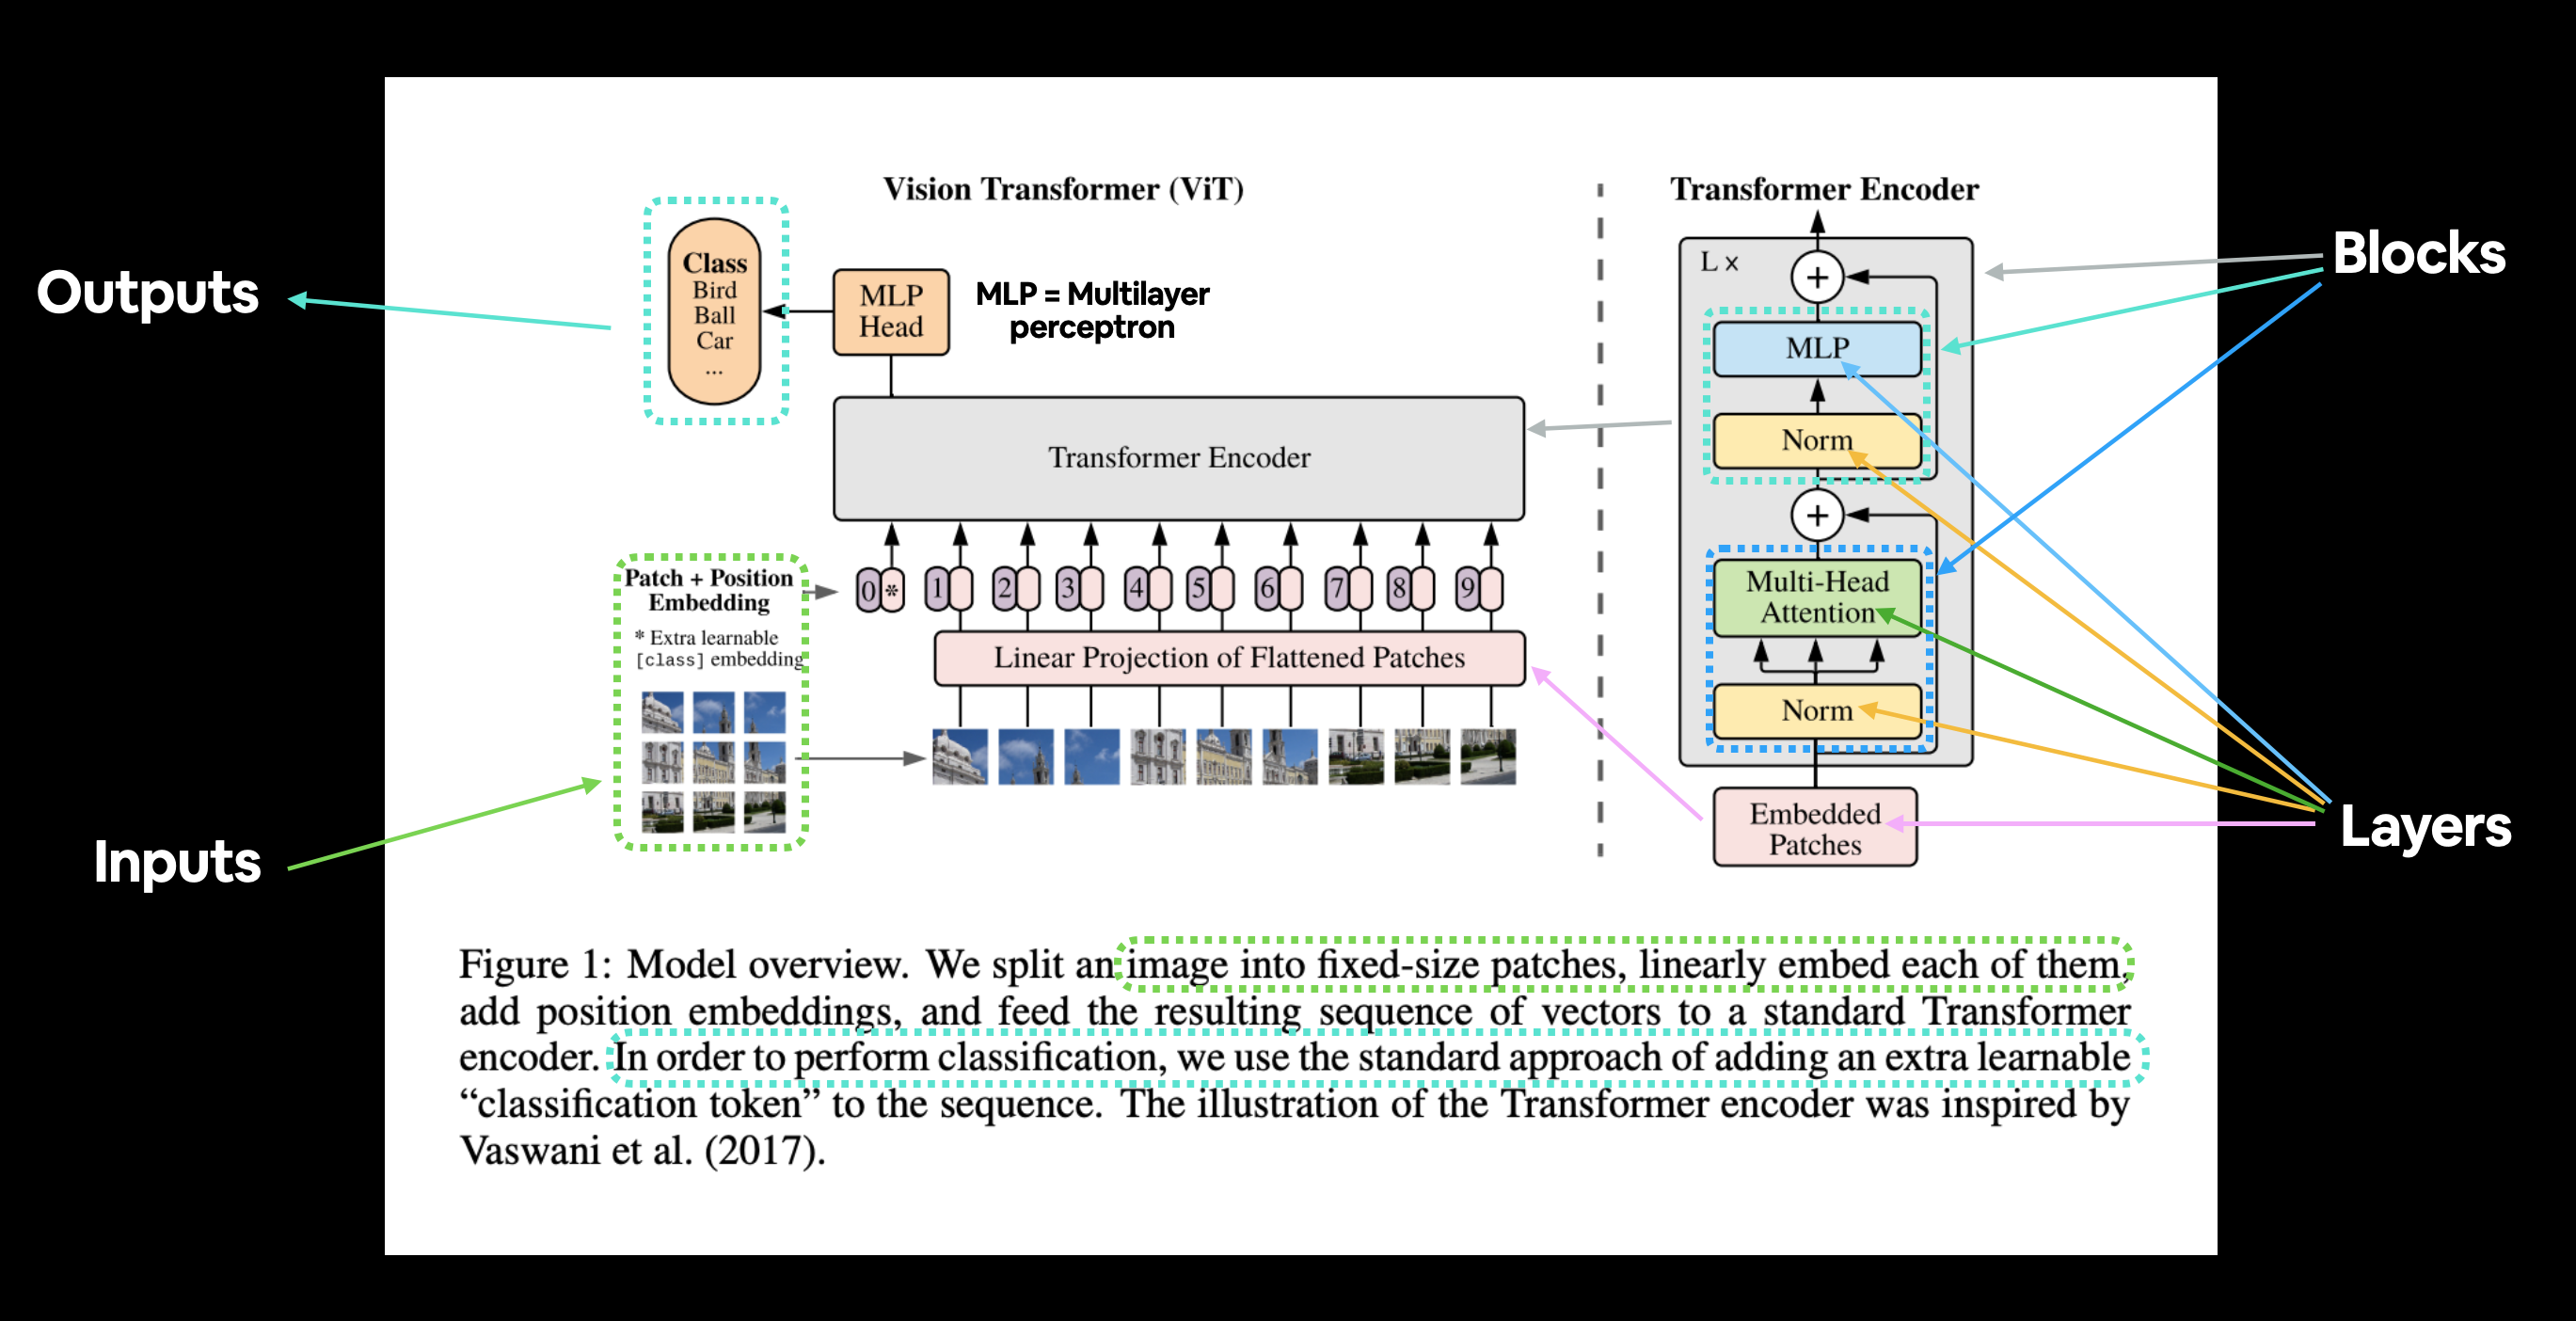

Figure 1 from the ViT Paper showcasing the different inputs, outputs, layers and blocks that create the architecture. Our goal will be to replicate each of these using PyTorch code.

The ViT architecture is comprised of several stages:

* **Patch + Position Embedding (inputs)** - Turns the input image into a sequence of image patches and adds a position number to specify in what order the patch comes in.
* **Linear projection of flattened patches** (Embedded Patches) - The image patches get turned into an embedding, the benefit of using an embedding rather than just the image values is that an embedding is a learnable representation (typically in the form of a vector) of the image that can improve with training.
* **Norm** - This is short for "Layer Normalization" or "LayerNorm", a technique for regularizing (reducing overfitting) a neural network, you can use LayerNorm via the PyTorch layer torch.nn.LayerNorm().
* **Multi-Head Attention** - This is a Multi-Headed Self-Attention layer or "MSA" for short. You can create an MSA layer via the PyTorch layer torch.nn.MultiheadAttention().
* **MLP** (or Multilayer perceptron) - A MLP can often refer to any collection of feedforward layers (or in PyTorch's case, a collection of layers with a forward() method). In the ViT Paper, the authors refer to the MLP as "MLP block" and it contains two torch.nn.Linear() layers with a torch.nn.GELU() non-linearity activation in between them (section 3.1) and a torch.nn.Dropout() layer after each (Appendix B.1).
* **Transformer Encoder** - The Transformer Encoder, is a collection of the layers listed above. There are two skip connections inside the Transformer encoder (the "+" symbols) meaning the layer's inputs are fed directly to immediate layers as well as subsequent layers. The overall ViT architecture is comprised of a number of Transformer encoders stacked on top of eachother.
* **MLP Head** - This is the output layer of the architecture, it converts the learned features of an input to a class output. Since we're working on image classification, you could also call this the "classifier head". The structure of the MLP Head is similar to the MLP block.

You might notice that many of the pieces of the ViT architecture can be created with existing PyTorch layers.

This is because of how PyTorch is designed, it's one of the main purposes of PyTorch to create reusable neural network layers for both researchers and machine learning practitioners.

**Question**: Why not code everything from scratch?

You could definitely do that by reproducing all of the math equations from the paper with custom PyTorch layers and that would certainly be an educative exercise, however, using pre-existing PyTorch layers is usually preferred as pre-existing layers have often been extensively tested and performance checked to make sure they run correctly and fast.


**Note**: We're going to be focused on writing PyTorch code to create these layers. For the background on what each of these layers does, I'd suggest reading the ViT Paper in full or reading the linked resources for each layer.

Let's take Figure 1 and adapt it to our FoodVision Mini problem of classifying images of food into pizza, steak or sushi.

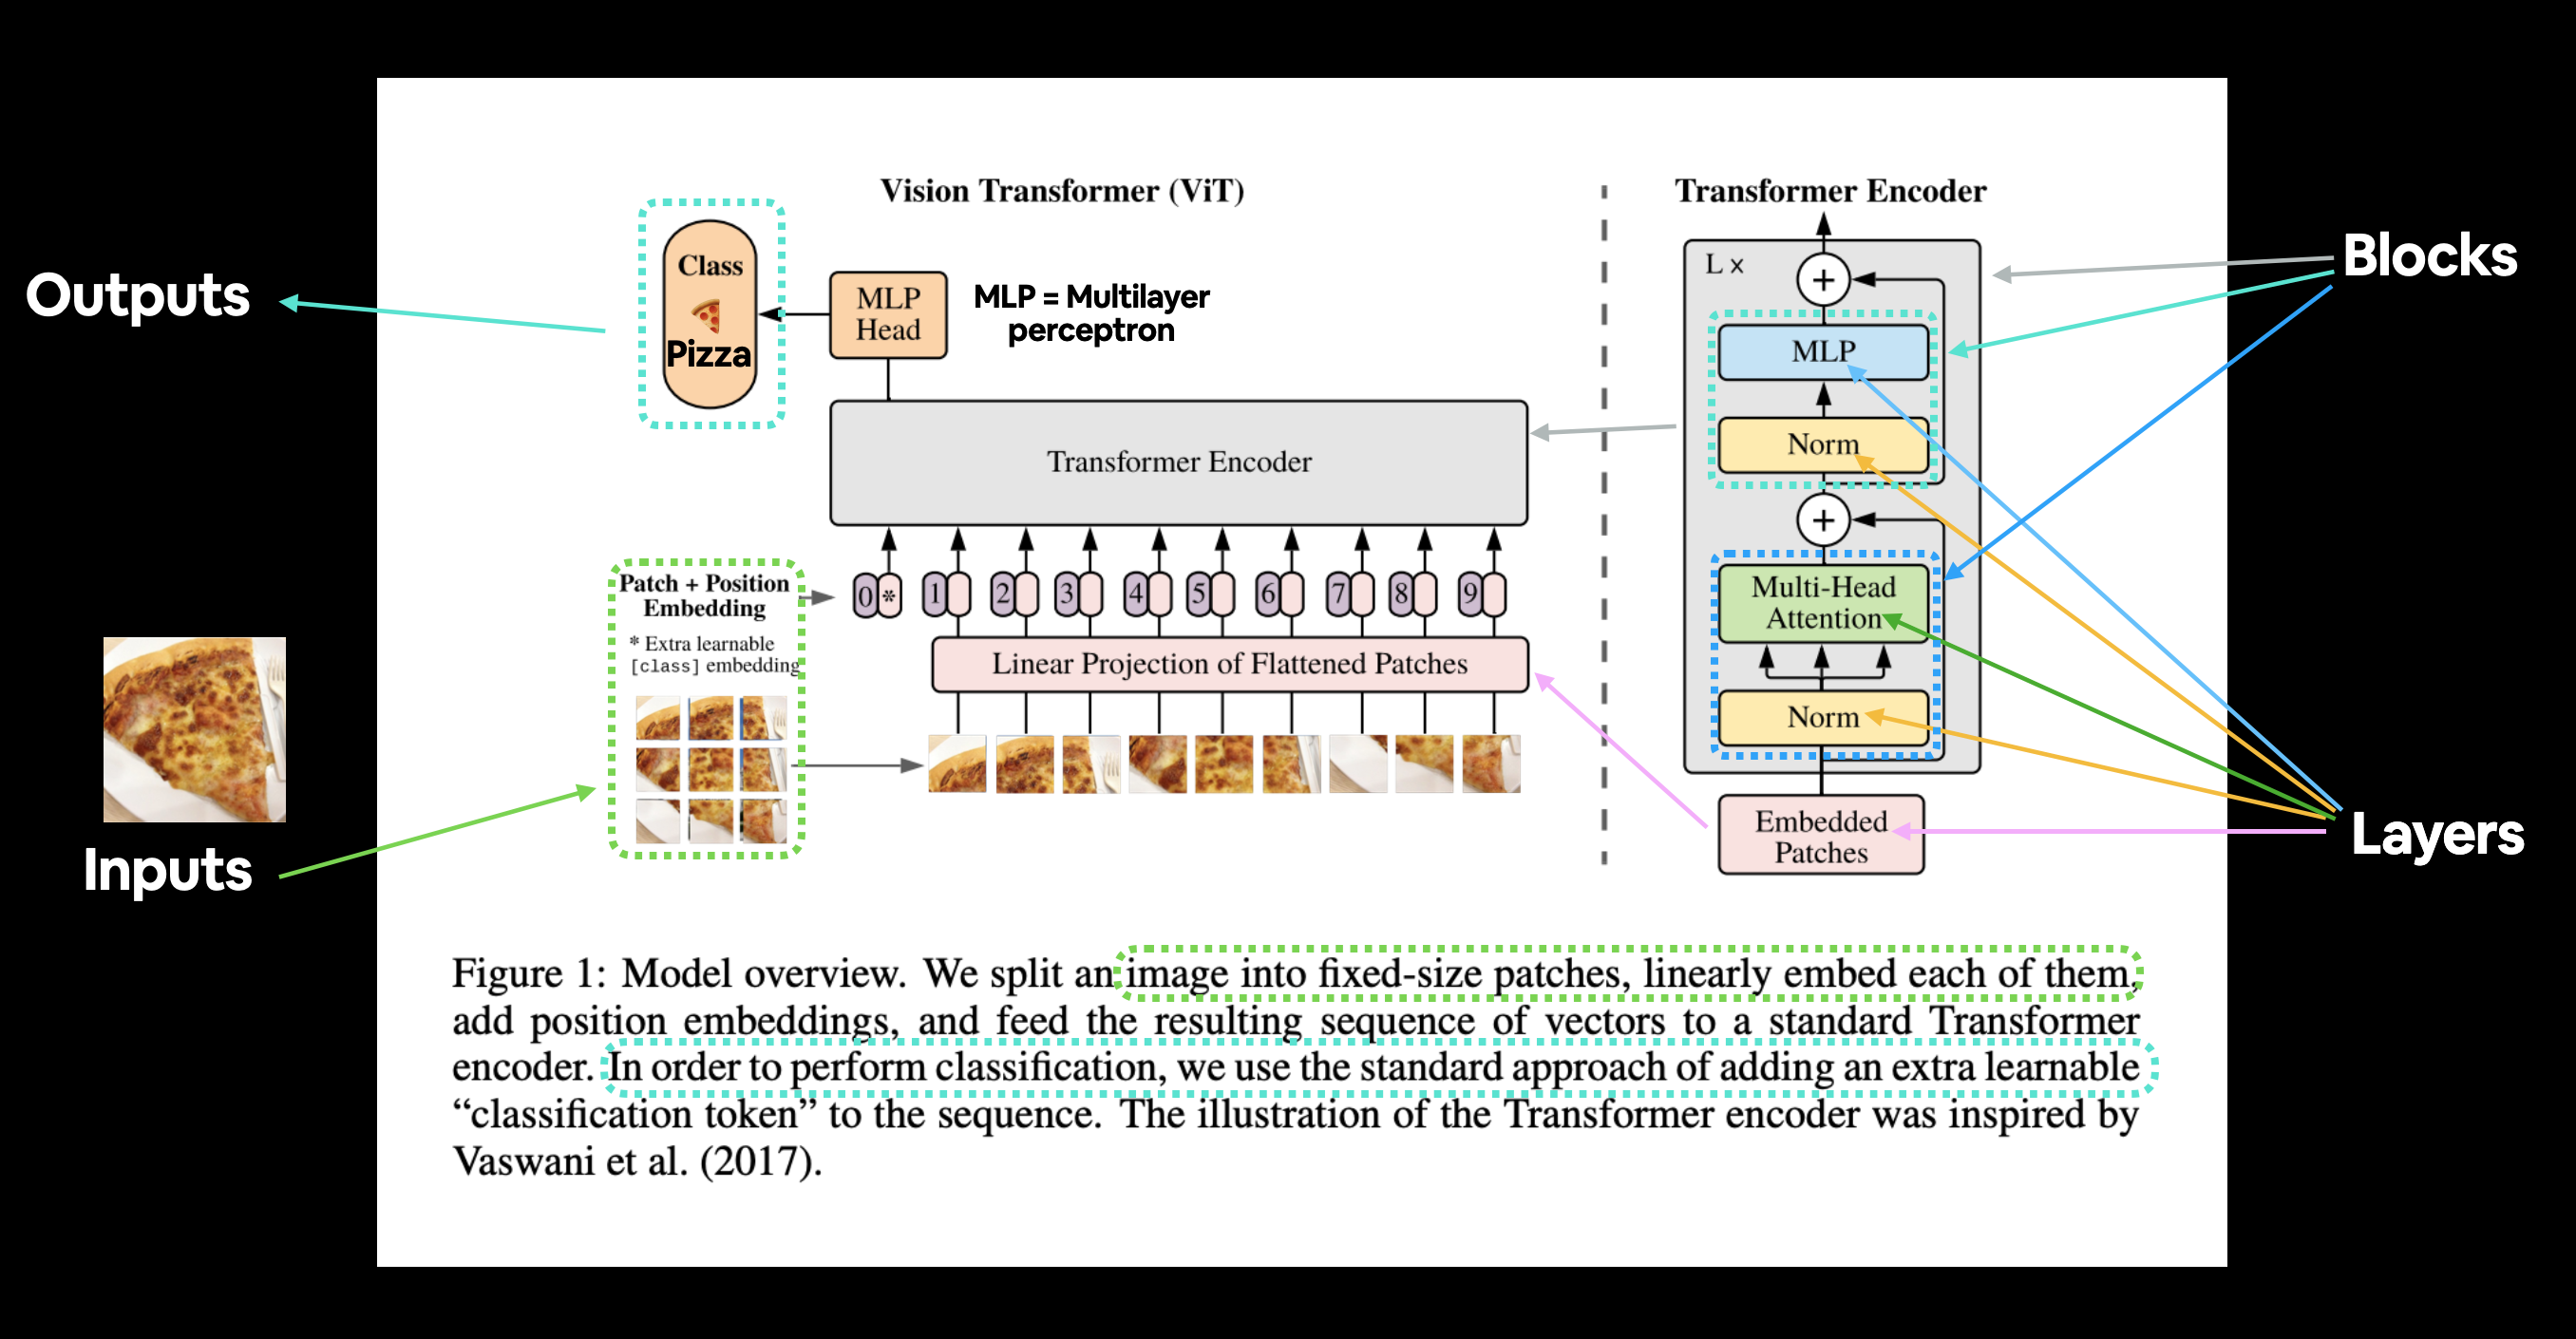





Figure 1 from the ViT Paper adapted for use with FoodVision Mini. An image of food goes in (pizza), the image gets turned into patches and then projected to an embedding. The embedding then travels through the various layers and blocks and (hopefully) the class "pizza" is returned.

#3.2.2 Exploring the Four Equations¶

The next main part(s) of the ViT paper we're going to look at are the four equations in section 3.1.

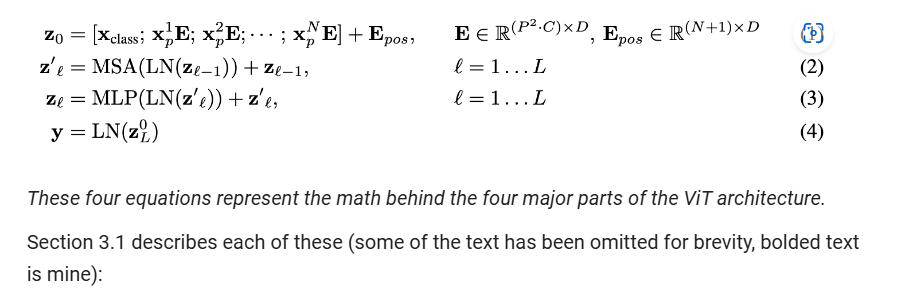

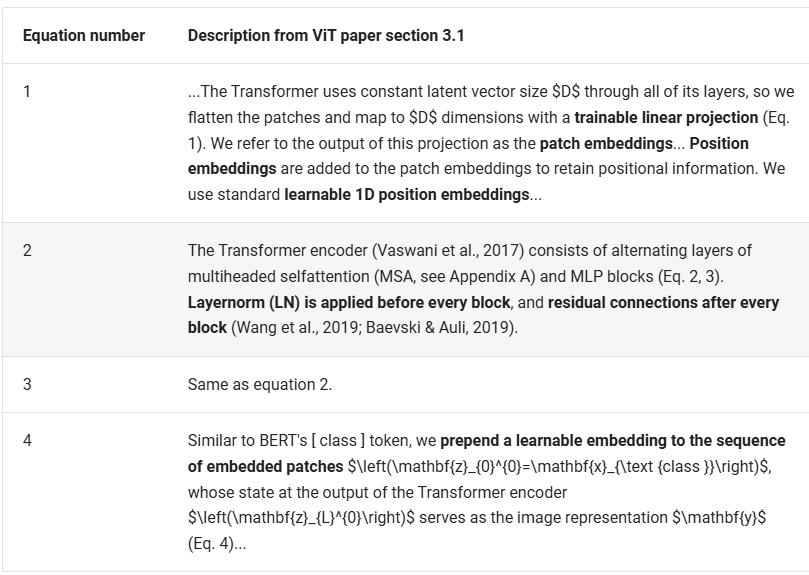

Let's map these descriptions to the ViT architecture in Figure 1.



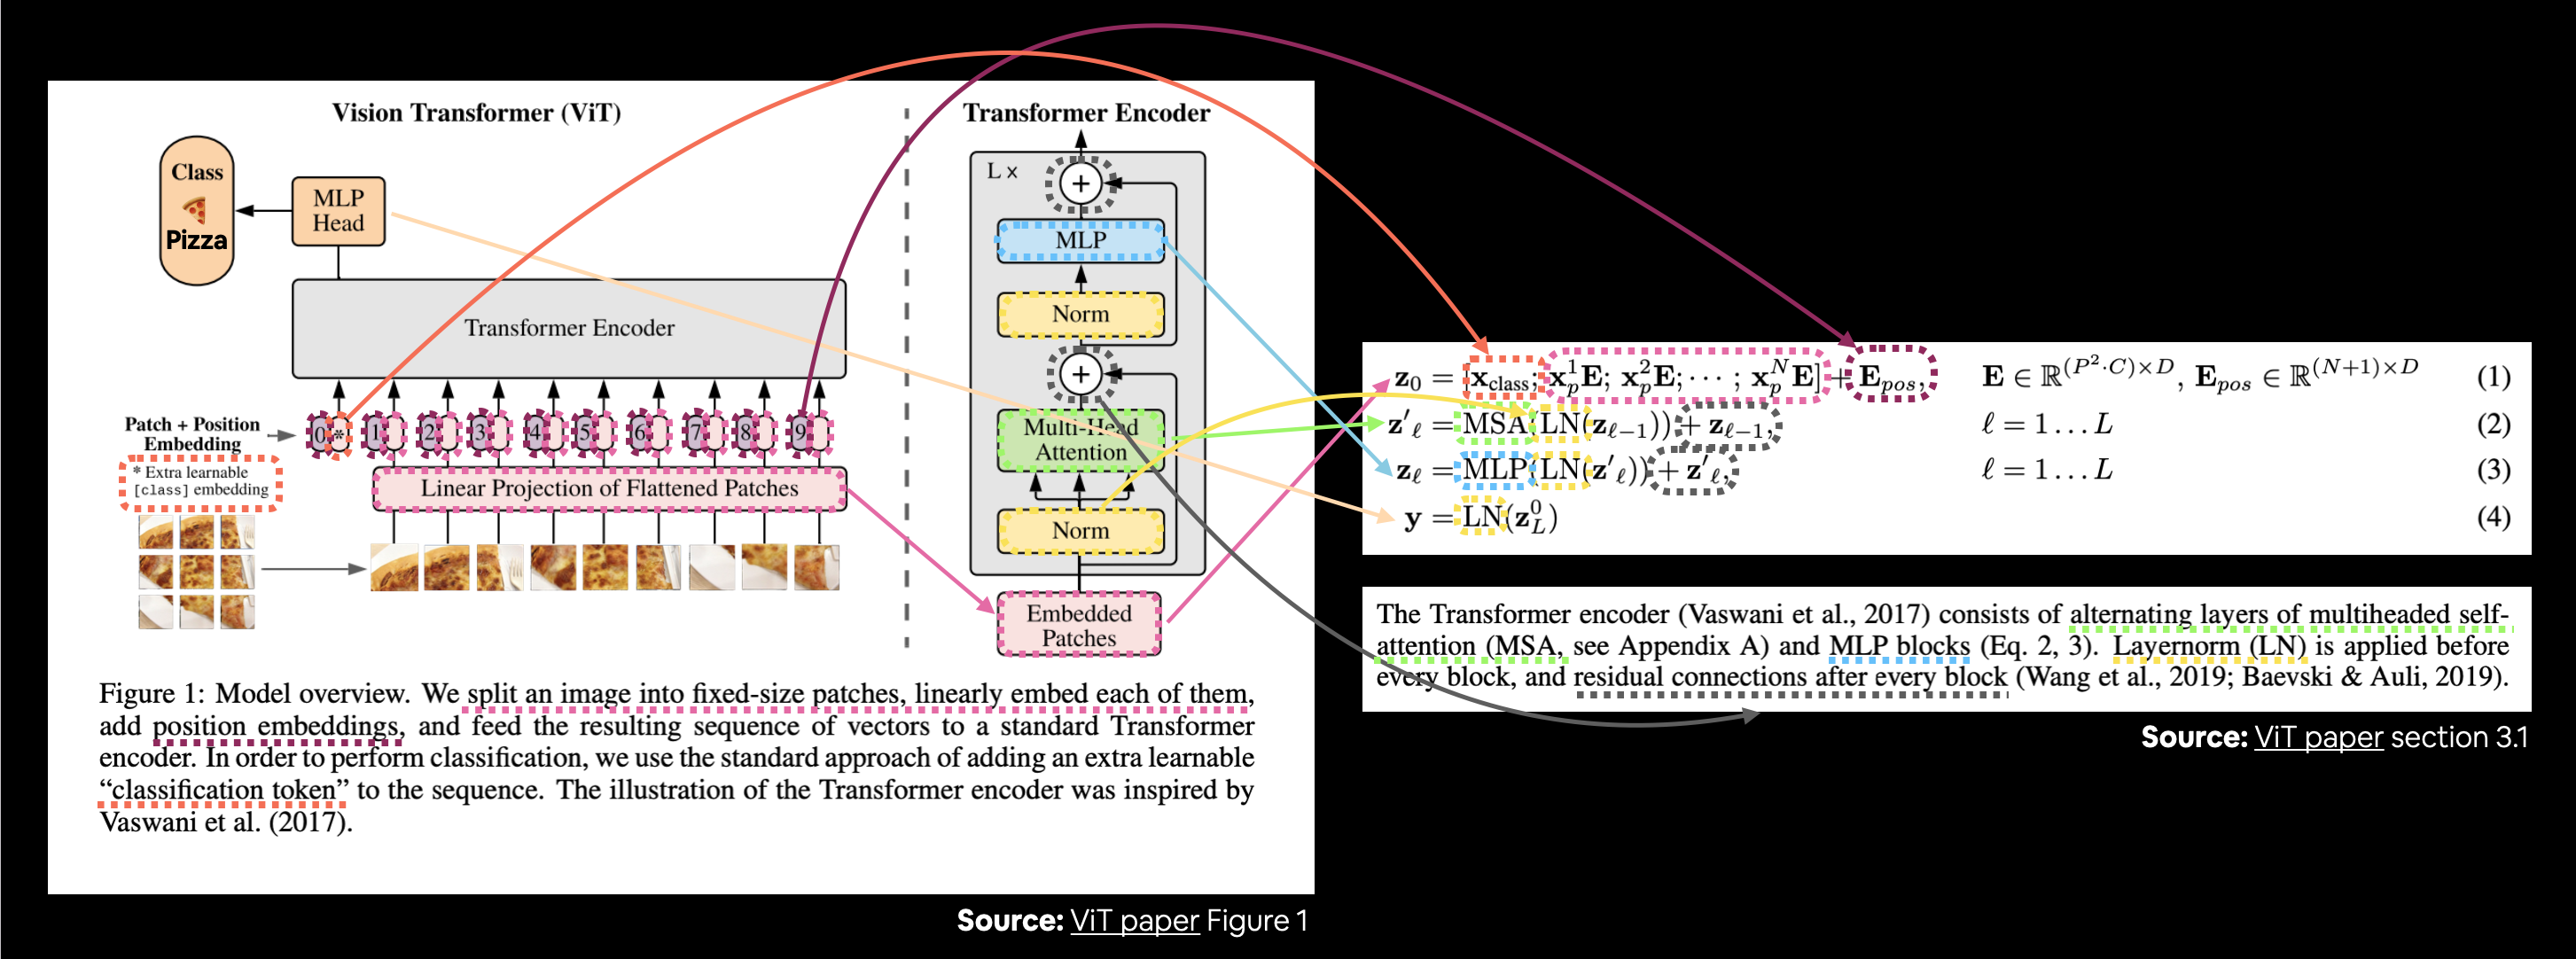

connecting Figure 1 from the ViT paper to the four equations from section 3.1 describing the math behind each of the layers/blocks.

There's a lot happening in the image above but following the coloured lines and arrows reveals the main concepts of the ViT architecture.

How about we break down each equation further (it will be our goal to recreate these with code)?

In all equations (except equation 4), "$\mathbf{z}$" is the raw output of a particular layer:

$\mathbf{z}_{0}$ is "z zero" (this is the output of the initial patch embedding layer).
$\mathbf{z}_{\ell}^{\prime}$ is "z of a particular layer prime" (or an intermediary value of z).
$\mathbf{z}_{\ell}$ is "z of a particular layer".
And $\mathbf{y}$ is the overall output of the architecture.

#3.2.3 Equation 1 overview
$$ \begin{aligned} \mathbf{z}_{0} &=\left[\mathbf{x}_{\text {class }} ; \mathbf{x}_{p}^{1} \mathbf{E} ; \mathbf{x}_{p}^{2} \mathbf{E} ; \cdots ; \mathbf{x}_{p}^{N} \mathbf{E}\right]+\mathbf{E}_{\text {pos }}, & & \mathbf{E} \in \mathbb{R}^{\left(P^{2} \cdot C\right) \times D}, \mathbf{E}_{\text {pos }} \in \mathbb{R}^{(N+1) \times D} \end{aligned} $$

This equation deals with the class token, patch embedding and position embedding ($\mathbf{E}$ is for embedding) of the input image.

In vector form, the embedding might look something like:

     `x_input = [class_token, image_patch_1, image_patch_2, image_patch_3...] + [class_token_position, image_patch_1_position, image_patch_2_position, image_patch_3_position...]`

Where each of the elements in the vector is learnable `(their requires_grad=True).`



#3.2.4 Equation 2 overview
$$ \begin{aligned} \mathbf{z}_{\ell}^{\prime} &=\operatorname{MSA}\left(\operatorname{LN}\left(\mathbf{z}_{\ell-1}\right)\right)+\mathbf{z}_{\ell-1}, & & \ell=1 \ldots L \end{aligned} $$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's a Multi-Head Attention layer (MSA) wrapping a LayerNorm layer (LN).

The addition on the end is the equivalent of adding the input to the output and forming a skip/residual connection.

We'll call this layer the "MSA block".

In pseudocode, this might look like:

`x_output_MSA_block = MSA_layer(LN_layer(x_input)) + x_input`
Notice the skip connection on the end (adding the input of the layers to the output of the layers).



#3.2.5 Equation 3 overview
$$ \begin{aligned} \mathbf{z}_{\ell} &=\operatorname{MLP}\left(\operatorname{LN}\left(\mathbf{z}_{\ell}^{\prime}\right)\right)+\mathbf{z}_{\ell}^{\prime}, & & \ell=1 \ldots L \\ \end{aligned} $$

This says that for every layer from $1$ through to $L$ (the total number of layers), there's also a Multilayer Perceptron layer (MLP) wrapping a LayerNorm layer (LN).

The addition on the end is showing the presence of a skip/residual connection.

We'll call this layer the "MLP block".

In pseudocode, this might look like:

   `x_output_MLP_block = MLP_layer(LN_layer(x_output_MSA_block)) + x_output_MSA_`
   

Notice the skip connection on the end (adding the input of the layers to the output of the layers).



#3.2.6 Equation 4 overview
$$ \begin{aligned} \mathbf{y} &=\operatorname{LN}\left(\mathbf{z}_{L}^{0}\right) & & \end{aligned} $$

This says for the last layer $L$, the output $y$ is the 0 index token of $z$ wrapped in a LayerNorm layer (LN).

Or in our case, the 0 index of `x_output_MLP_block:`

`y = Linear_layer(LN_layer(x_output_MLP_block[0]))`
Of course there are some simplifications above but we'll take care of those when we start to write PyTorch code for each section.

**Note**: The above section covers alot of information. But don't forget if something doesn't make sense, you can always research it further. By asking questions like "what is a residual connection?".

3.2.7 Exploring Table 1
The final piece of the ViT architecture puzzle we'll focus on (for now) is Table 1.




---


Model	Layers	Hidden size $D$	MLP size	Heads	Params



---


ViT-Base	12	768	3072	12	$86M$


---


ViT-Large	24	1024	4096	16	$307M$


---


ViT-Huge	32	1280	5120	16	$632M$


---





Table 1: Details of Vision Transformer model variants. Source: ViT paper.


You can see the numbers gradually increase from ViT-Base to ViT-Huge.

We're going to focus on replicating ViT-Base (start small and scale up when necessary) but we'll be writing code that could easily scale up to the larger variants.

Breaking the hyperparameters down:

* **Layers** - How many Transformer Encoder blocks are there? (each of these will contain a MSA block and MLP block)
* **Hidden size $D$** - This is the embedding dimension throughout the architecture, this will be the size of the vector that our image gets turned into when it gets patched and embedded. Generally, the larger the embedding dimension, the more information can be captured, the better results. However, a larger embedding comes at the cost of more computation.
* **MLP size**- What are the number of hidden units in the MLP layers?
* **Heads** - How many heads are there in the Multi-Head Attention layers?
* **Params**- What are the total number of parameters of the model? Generally, more parameters leads to better performance but at the cost of more computation. You'll notice even ViT-Base has far more parameters than any other model we've used so far.
We'll use these values as the hyperparameter settings for our ViT architecture.

#4. Equation 1: Split data into patches and creating the class, position and patch embedding
I remember one of my machine learning engineer friends used to say "it's all about the embedding."

As in, if you can represent your data in a good, learnable way **(as embeddings are learnable representations)**, chances are, a learning algorithm will be able to perform well on them.

With that being said, let's start by creating the class, position and patch embeddings for the ViT architecture.

We'll start with the **patch embedding.**

This means we'll be turning our input images in a sequence of patches and then embedding those patches.

Recall that an**embedding** is a learnable representation of some form and is often a vector.

The term learnable is important because this means the numerical representation of an input image (that the model sees) can be improved over time.

We'll begin by following the opening paragraph of section 3.1 of the ViT paper (bold mine):

  The standard Transformer receives as input a 1D sequence of token embeddings. To handle 2D images, we reshape the image $\mathbf{x} \in \mathbb{R}^{H \times W \times C}$ into a sequence of flattened 2D patches $\mathbf{x}_{p} \in \mathbb{R}^{N \times\left(P^{2} \cdot C\right)}$, where $(H, W)$ is the resolution of the original image, $C$ is the number of channels, $(P, P)$ is the resolution of each image patch, and $N=H W / P^{2}$ is the resulting number of patches, which also serves as the effective input sequence length for the Transformer. The Transformer uses constant latent vector size $D$ through all of its layers, so we flatten the patches and map to $D$ dimensions with a trainable linear projection (Eq. 1). We refer to the output of this projection as the **patch embeddings.**